In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [5]:
df_raw_mini= pd.read_csv('MiniAdult/MiniAdultDatasets/mini-adult.csv')
df_raw_mini.head()

,age,workclass,education,marital-status,occupation,relationship,gender,native-country,income
0,51,Private,Some-college,Divorced,Exec-managerial,Unmarried,Female,United-States,<=50K
1,67,Self-emp-not-inc,HS-grad,Married-civ-spouse,Farming-fishing,Husband,Male,United-States,<=50K
2,28,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,Male,United-States,>50K
3,22,Private,10th,Never-married,Transport-moving,Not-in-family,Male,United-States,<=50K
4,18,Private,HS-grad,Never-married,Other-service,Not-in-family,Female,United-States,<=50K


In [6]:
df_raw_employee= pd.read_csv('Employee/EmployeeDatasets/mini-employee.csv')
df_raw_employee.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Masters,2015,Pune,3,28,Female,No,2,0
1,Bachelors,2015,Bangalore,3,38,Male,No,5,0
2,Bachelors,2018,Pune,3,26,Female,No,4,1
3,Bachelors,2014,New Delhi,3,26,Male,No,4,0
4,Bachelors,2015,Bangalore,3,25,Male,No,3,0


In [61]:
# Read Cardio Dataset
df_raw_cardio = pd.read_csv('Cardio/CardioDatasets/cardio.csv')
df_raw_cardio.head()

,age,gender,bmi,cholesterol,gluc,smoke,alco,active,cardio
0,44,1,27,1,1,1,0,1,0
1,39,1,23,1,1,0,0,1,0
2,57,2,25,1,1,0,0,1,0
3,39,1,32,3,3,0,0,0,1
4,48,1,26,2,1,0,0,1,0


In [13]:
education = preprocessing.LabelEncoder().fit(df_raw_mini['education'])
df_raw_mini['education'] = education.transform(df_raw_mini['education'])

relationship = preprocessing.LabelEncoder().fit(df_raw_mini['relationship'])
df_raw_mini['relationship'] = relationship.transform(df_raw_mini['relationship'])

occupation = preprocessing.LabelEncoder().fit(df_raw_mini['occupation'])
df_raw_mini['occupation'] = occupation.transform(df_raw_mini['occupation'])

sex = preprocessing.LabelEncoder().fit(df_raw_mini['gender'])
df_raw_mini['gender'] = sex.transform(df_raw_mini['gender'])

nc = preprocessing.LabelEncoder().fit(df_raw_mini['native-country'])
df_raw_mini['native-country'] = nc.transform(df_raw_mini['native-country'])

income = preprocessing.LabelEncoder().fit(df_raw_mini['income'])
df_raw_mini['income'] = income.transform(df_raw_mini['income'])

In [44]:
education = preprocessing.LabelEncoder().fit(df_raw_employee['Education'])
df_raw_employee['Education'] = education.transform(df_raw_employee['Education'])

city = preprocessing.LabelEncoder().fit(df_raw_employee['City'])
df_raw_employee['City'] = city.transform(df_raw_employee['City'])

gender = preprocessing.LabelEncoder().fit(df_raw_employee['Gender'])
df_raw_employee['Gender'] = gender.transform(df_raw_employee['Gender'])

ever_benched = preprocessing.LabelEncoder().fit(df_raw_employee['EverBenched'])
df_raw_employee['EverBenched'] = ever_benched.transform(df_raw_employee['EverBenched'])

experience = preprocessing.LabelEncoder().fit(df_raw_employee['ExperienceInCurrentDomain'])
df_raw_employee['ExperienceInCurrentDomain'] = experience.transform(df_raw_employee['ExperienceInCurrentDomain'])


## 4 ML Algorithms on Raw Mini Adult Dataset

In [14]:
# Mini Adult Dataset X and y definition for classification
X = df_raw_mini[['age', 'education', 'relationship', 'occupation', 'gender', 'native-country']].values
y = df_raw_mini['income'].values

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify = y)

In [16]:
# Random Forest Classifier on Mini Adult Dataset
rf = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=42)
param_grid = {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9]}
grid_clf = GridSearchCV(rf, param_grid, cv=5, refit=True)
grid_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9]})

In [17]:
rf = grid_clf.best_estimator_
rf.score(X_test, y_test)

0.83

In [18]:
# K Nearest Neighbors Classifier on Mini Adult Dataset
knn = KNeighborsClassifier(metric='minkowski')
param_grid = {'n_neighbors': list(range(3,51))}
grid_knn = GridSearchCV(knn, param_grid, cv=5, refit=True)
grid_knn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                         24, 25, 26, 27, 28, 29, 30, 31, 32, ...]})

In [19]:
knn = grid_knn.best_estimator_
knn.score(X_test, y_test)

0.7

In [20]:
# Gradient Boosting Classifier on Mini Adult Dataset
gb = GradientBoostingClassifier(random_state=42)
param_grid = {'n_estimators': [50, 100, 150],
                  'learning_rate': [0.01, 0.1, 0.5, 1],
                  'max_depth': [2, 4, 6, 8, 10]}
grid_gb = GridSearchCV(gb, param_grid, cv=5, refit=True)
grid_gb.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 0.5, 1],
                         'max_depth': [2, 4, 6, 8, 10],
                         'n_estimators': [50, 100, 150]})

In [21]:
gb = grid_gb.best_estimator_
gb.score(X_test, y_test)

0.8

In [22]:
# AdaBoost Classifier on Mini Adult Dataset
ab = AdaBoostClassifier(random_state=42)
param_grid = {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 0.5, 1]}
grid_ab = GridSearchCV(ab, param_grid, cv=5, refit=True)
grid_ab.fit(X_train, y_train)

/Users/iremyurdakurban/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/iremyurdakurban/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/iremyurdakurban/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/iremyurdakurban/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be r

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 0.5, 1],
                         'n_estimators': [50, 100, 150]})

In [23]:
ab = grid_ab.best_estimator_
ab.score(X_test, y_test)

0.83

In [24]:
from sklearn.metrics import classification_report, roc_curve, auc, f1_score

In [30]:
# RF:
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.88      0.89        77
           1       0.62      0.65      0.64        23

    accuracy                           0.83       100
   macro avg       0.76      0.77      0.76       100
weighted avg       0.83      0.83      0.83       100



In [32]:
# KNN:
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.75      0.79        77
           1       0.39      0.52      0.44        23

    accuracy                           0.70       100
   macro avg       0.61      0.64      0.62       100
weighted avg       0.74      0.70      0.71       100



In [33]:
# GB:
y_pred = gb.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87        77
           1       0.57      0.57      0.57        23

    accuracy                           0.80       100
   macro avg       0.72      0.72      0.72       100
weighted avg       0.80      0.80      0.80       100



In [34]:
# AB:
y_pred = ab.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89        77
           1       0.67      0.52      0.59        23

    accuracy                           0.83       100
   macro avg       0.77      0.72      0.74       100
weighted avg       0.82      0.83      0.82       100



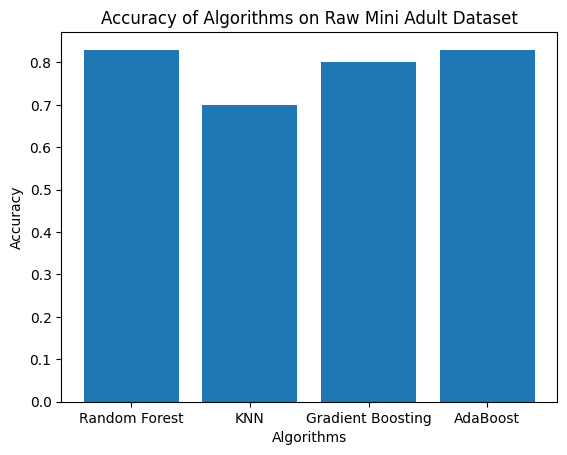

In [43]:
import matplotlib.pyplot as plt

# Accuracy scores of the algorithms
accuracy_scores = [rf.score(X_test, y_test), knn.score(X_test, y_test), gb.score(X_test, y_test), ab.score(X_test, y_test)]

# Algorithm names
algorithm_names = ['Random Forest', 'KNN', 'Gradient Boosting', 'AdaBoost']

# Plotting the accuracy scores
plt.bar(algorithm_names, accuracy_scores)
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Accuracy of Algorithms on Raw Mini Adult Dataset')
plt.savefig('Figures/Accuracy of Algorithms on Raw Mini Adult Dataset.png')
plt.show()


## 4 ML Algorithms on Raw Employee Dataset

In [45]:
# Employee Dataset X and y definition for classification
X = df_raw_employee[['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age' ,'Gender', 'EverBenched', 'ExperienceInCurrentDomain']]
y = df_raw_employee['LeaveOrNot'].values

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

In [47]:
rf = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=42)
param_grid = {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9]}
grid_clf = GridSearchCV(rf, param_grid, cv=5, refit=True)
grid_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9]})

In [48]:
rf = grid_clf.best_estimator_
rf.score(X_test, y_test)

0.84

In [49]:
knn = KNeighborsClassifier(metric='minkowski')
param_grid = {'n_neighbors': list(range(3,51))}
grid_knn = GridSearchCV(knn, param_grid, cv=5, refit=True)
grid_knn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                         24, 25, 26, 27, 28, 29, 30, 31, 32, ...]})

In [50]:
knn = grid_knn.best_estimator_
knn.score(X_test, y_test)

0.7

In [51]:
gb = GradientBoostingClassifier(random_state=42)
param_grid = {'n_estimators': [50, 100, 150],
                  'learning_rate': [0.01, 0.1, 0.5, 1],
                  'max_depth': [2, 4, 6, 8, 10]}
grid_gb = GridSearchCV(gb, param_grid, cv=5, refit=True)
grid_gb.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 0.5, 1],
                         'max_depth': [2, 4, 6, 8, 10],
                         'n_estimators': [50, 100, 150]})

In [52]:
gb = grid_gb.best_estimator_
gb.score(X_test, y_test)

0.84

In [53]:
ab = AdaBoostClassifier(random_state=42)
param_grid = {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 0.5, 1]}
grid_ab = GridSearchCV(ab, param_grid, cv=5, refit=True)
grid_ab.fit(X_train, y_train)

/Users/iremyurdakurban/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/iremyurdakurban/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/iremyurdakurban/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/iremyurdakurban/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be r

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 0.5, 1],
                         'n_estimators': [50, 100, 150]})

In [55]:
ab = grid_ab.best_estimator_
ab.score(X_test, y_test)

0.83

In [56]:
# RF:
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88        64
           1       0.88      0.64      0.74        36

    accuracy                           0.84       100
   macro avg       0.85      0.80      0.81       100
weighted avg       0.85      0.84      0.83       100



In [57]:
# KNN:
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.94      0.80        64
           1       0.71      0.28      0.40        36

    accuracy                           0.70       100
   macro avg       0.71      0.61      0.60       100
weighted avg       0.70      0.70      0.66       100



In [58]:
# GB:
y_pred = gb.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89        64
           1       0.95      0.58      0.72        36

    accuracy                           0.84       100
   macro avg       0.88      0.78      0.81       100
weighted avg       0.86      0.84      0.83       100



In [59]:
# AB:
y_pred = ab.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88        64
           1       0.95      0.56      0.70        36

    accuracy                           0.83       100
   macro avg       0.87      0.77      0.79       100
weighted avg       0.85      0.83      0.82       100



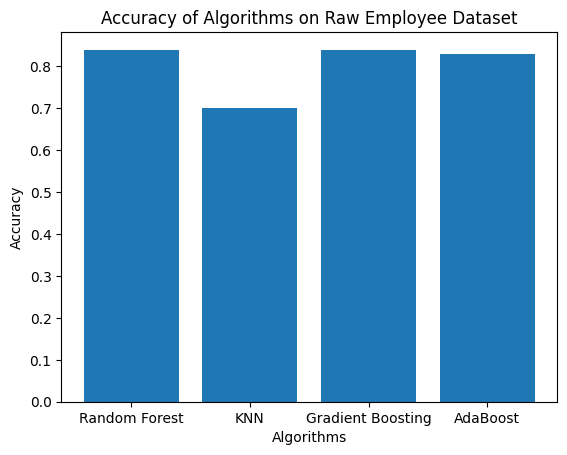

In [60]:
# Accuracy scores of the algorithms
accuracy_scores = [rf.score(X_test, y_test), knn.score(X_test, y_test), gb.score(X_test, y_test), ab.score(X_test, y_test)]

# Algorithm names
algorithm_names = ['Random Forest', 'KNN', 'Gradient Boosting', 'AdaBoost']

# Plotting the accuracy scores
plt.bar(algorithm_names, accuracy_scores)
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Accuracy of Algorithms on Raw Employee Dataset')
plt.savefig('Figures/Accuracy of Algorithms on Raw Employee Dataset.png')
plt.show()


## 4 ML Algorithms on Raw Cardio Dataset

In [62]:
# Cardio Dataset X and y definition for classification
X = df_raw_cardio[['age', 'gender', 'bmi', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']]
y = df_raw_cardio['cardio'].values

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify = y)

In [64]:
rf = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=42)
param_grid = {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9]}
grid_clf = GridSearchCV(rf, param_grid, cv=5, refit=True)
grid_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9]})

In [65]:
rf = grid_clf.best_estimator_
rf.score(X_test, y_test)

0.56

In [66]:
knn = KNeighborsClassifier(metric='minkowski')
param_grid = {'n_neighbors': list(range(3,51))}
grid_knn = GridSearchCV(knn, param_grid, cv=5, refit=True)
grid_knn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                         24, 25, 26, 27, 28, 29, 30, 31, 32, ...]})

In [67]:
knn = grid_knn.best_estimator_
knn.score(X_test, y_test)

0.51

In [68]:
gb = GradientBoostingClassifier(random_state=42)
param_grid = {'n_estimators': [50, 100, 150],
                  'learning_rate': [0.01, 0.1, 0.5, 1],
                  'max_depth': [2, 4, 6, 8, 10]}
grid_gb = GridSearchCV(gb, param_grid, cv=5, refit=True)
grid_gb.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 0.5, 1],
                         'max_depth': [2, 4, 6, 8, 10],
                         'n_estimators': [50, 100, 150]})

In [69]:
gb = grid_gb.best_estimator_
gb.score(X_test, y_test)

0.46

In [70]:
ab = AdaBoostClassifier(random_state=42)
param_grid = {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 0.5, 1]}
grid_ab = GridSearchCV(ab, param_grid, cv=5, refit=True)
grid_ab.fit(X_train, y_train)

/Users/iremyurdakurban/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/iremyurdakurban/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/iremyurdakurban/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/iremyurdakurban/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be r

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 0.5, 1],
                         'n_estimators': [50, 100, 150]})

In [71]:
ab = grid_ab.best_estimator_
ab.score(X_test, y_test)

0.53

In [72]:
#RF:
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.61      0.60        54
           1       0.52      0.50      0.51        46

    accuracy                           0.56       100
   macro avg       0.56      0.56      0.56       100
weighted avg       0.56      0.56      0.56       100

